***Prepare a prediction model for profit of 50_startups data.***
***Do transformations for getting better predictions of profit and***
***make a table containing R^2 value for each prepared model.*** 

R&D Spend -- Research and devolop spend in the past few years

Administration -- spend on administration in the past few years

Marketing Spend -- spend on Marketing in the past few years

State -- states from which data is collected

Profit  -- profit of each state in the past few years


***Load Data***

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/50_Startups.csv')

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [ ]:
df.shape

(50, 5)

***EDA***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


All dtypes are correct. Only the State column is object dtype so we will have to transform it using dummy variables.

In [ ]:
#check for missing values
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

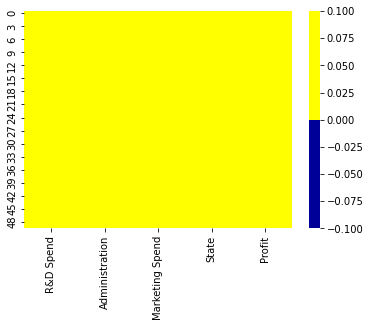

In [ ]:
#to genrate heat map
import seaborn as sns
cols = df.columns
colors = ['#000099', '#ffff00']   #define colors, yellow for missing, blue for non missing
sns.heatmap(df[cols].isnull(),
               cmap= sns.color_palette(colors))

Hence, we can conclude no missing values in any column.

In [ ]:
#check for duplicate values
df[df.duplicated()].shape

(0, 5)

no duplicate rows

In [ ]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

#check for outliers

In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


[array([], dtype=float64)]

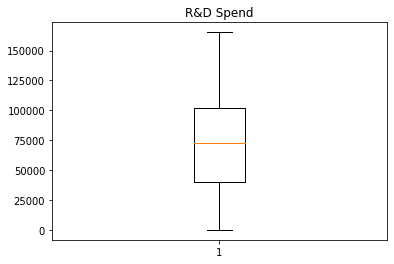

In [ ]:
#Outlier Detection
import matplotlib.pyplot as plt
box = plt.boxplot(df['R&D Spend'])
plt.title('R&D Spend')
[item.get_ydata() for item in box['fliers']]   #fliers for otuliers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


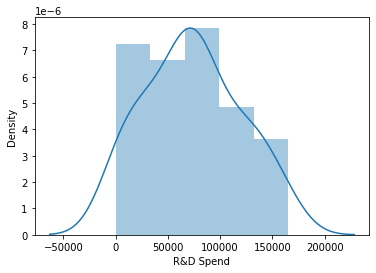

In [ ]:
sns.distplot(df['R&D Spend'])

[array([], dtype=float64)]

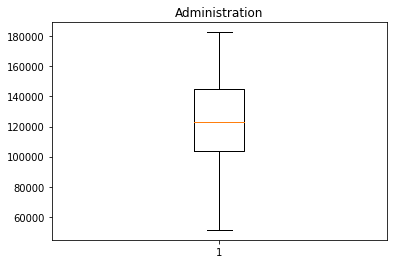

In [ ]:
box1 = plt.boxplot(df['Administration'])
plt.title('Administration')
[item.get_ydata() for item in box1['fliers']]   #fliers for otuliers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


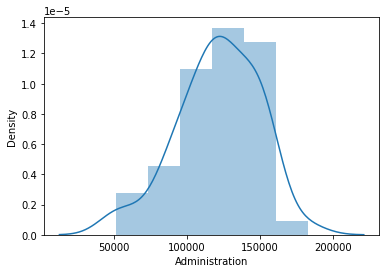

In [ ]:
sns.distplot(df['Administration'])

[array([], dtype=float64)]

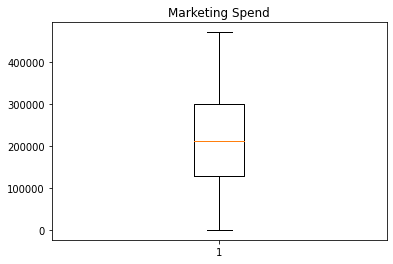

In [ ]:
box2 = plt.boxplot(df['Marketing Spend'])
plt.title('Marketing Spend')
[item.get_ydata() for item in box2['fliers']]   #fliers for otuliers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


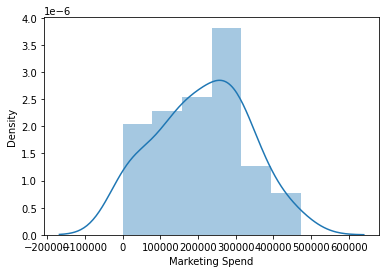

In [ ]:
sns.distplot(df['Marketing Spend'])

In [ ]:
df.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

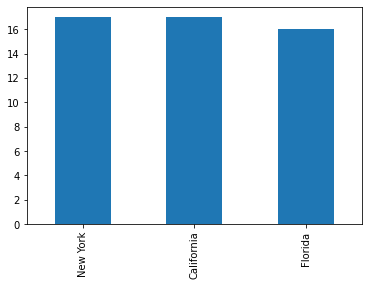

In [ ]:
df['State'].value_counts().plot.bar()

[array([14681.4])]

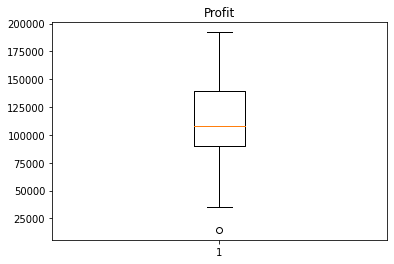

In [ ]:
box3 = plt.boxplot(df['Profit'])
plt.title('Profit')
[item.get_ydata() for item in box3['fliers']]   #fliers for otuliers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


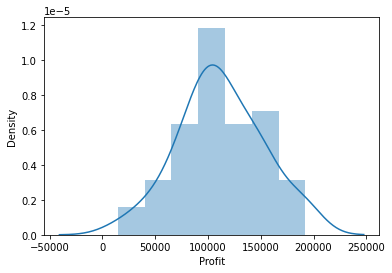

In [ ]:
sns.distplot(df['Profit'])

As we can check here, we do not have outliers in independent variable but it is in the dependent variable. 

**Outlier in the dependent variable:**

In [ ]:
import numpy as np
Q1 = np.quantile(df.Profit,0.25)
Q3 = np.quantile(df.Profit,0.75)
med = np.median(df.Profit)
IQR = Q3 - Q1
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)
print('First Quantile=', Q1,'\n' 'Second Quantile=', med,'\n' 'Third Quantile=', Q3,'\n'
      'Inter-Quartile Range=', IQR,'\n' 'Upper Whisker=', upper_bound,'\n' 'Lower Whisker=', lower_bound)

First Quantile= 90138.9025 
Second Quantile= 107978.19 
Third Quantile= 139765.97749999998 
Inter-Quartile Range= 49627.07499999998 
Upper Whisker= 214206.58999999997 
Lower Whisker= 15698.290000000023


In [ ]:
Outliers = df.Profit[(df.Profit <= lower_bound) | (df.Profit >= upper_bound)]
print('The outlier in the boxplot:',Outliers)

The outlier in the boxplot: 49    14681.4
Name: Profit, dtype: float64


In [ ]:
display(df[df.index.isin([49])],)

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


{'boxes': [<matplotlib.lines.Line2D at 0x7fb4d47381d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb4d47411d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb4d4749210>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb4d4741c90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb4d4738710>,
  <matplotlib.lines.Line2D at 0x7fb4d4738c50>]}

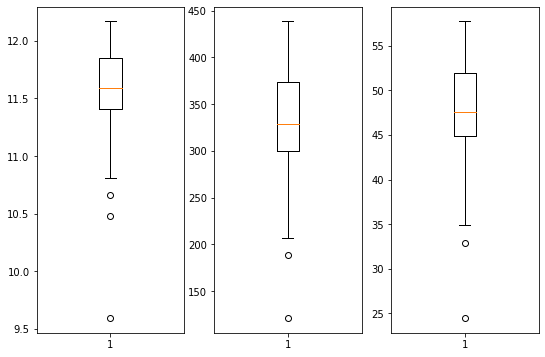

In [ ]:
plt.subplots(figsize = (9,6))
plt.subplot(131)
plt.boxplot(np.log(df['Profit']))
plt.subplot(132)
plt.boxplot(np.sqrt(df['Profit']))
plt.subplot(133)
plt.boxplot(np.cbrt(df['Profit']))

Here we can observe, even after doing transformation we are not able to remove the outliers.

***Let us create a model and then we will compare models.***

In [ ]:
#Renaming columns to make names shorter
df1 = df.rename({'R&D Spend':'RD', 'Marketing Spend':'Marketing'}, axis = 1)

In [ ]:
df1.head()

,RD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


As "State" is a categorical object column we will have to perform transformation to this column.

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
model = smf.ols('Profit~RD+Administration+Marketing', data = df1).fit()

In [ ]:
#model parameters
model.params

Intercept         50122.192990
RD                    0.805715
Administration       -0.026816
Marketing             0.027228
dtype: float64

In [ ]:
(model.rsquared, model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

Let us try median imputation for profit outlier.

In [ ]:
df1.Profit.median()

107978.19

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Profit before median imputation')

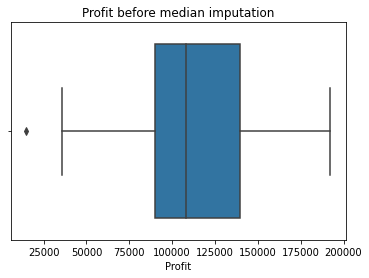

In [ ]:
df2=df1.copy()
sns.boxplot(df1['Profit'])
plt.title('Profit before median imputation')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


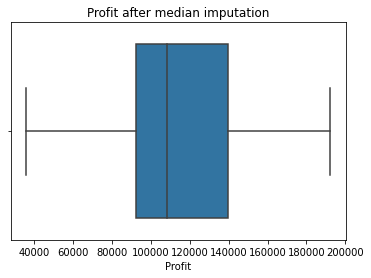

In [ ]:
for i in df2['Profit']:
    q1 = np.quantile(df1.Profit,0.25)
    q3 = np.quantile(df1.Profit,0.75)
    med = np.median(df1.Profit)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Profit'] = df2['Profit'].replace(i, np.median(df2['Profit']))
sns.boxplot(df2['Profit'])
plt.title('Profit after median imputation')
plt.show()

In [ ]:
#Compare median imputation model with first model
model1 = smf.ols('Profit~RD+Administration+Marketing', data = df2).fit()
(model1.rsquared, model1.rsquared_adj)

(0.9182958360807372, 0.91296730365122)

By median imputation the model accuracy has reduced. So we will not follow this method.

Let us try with Mean imputation.

In [ ]:
df1.Profit.mean()

112012.63920000002

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Profit before mean imputation')

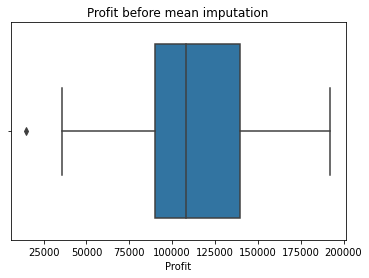

In [ ]:
df3=df1.copy()
sns.boxplot(df1['Profit'])
plt.title('Profit before mean imputation')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


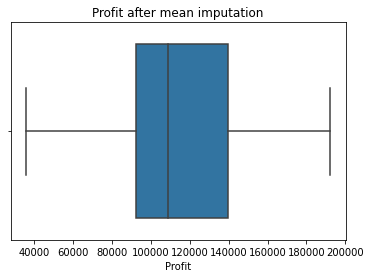

In [ ]:
for i in df3['Profit']:
    q1 = np.quantile(df1.Profit,0.25)
    q3 = np.quantile(df1.Profit,0.75)
    me = np.mean(df1.Profit)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df3['Profit'] = df3['Profit'].replace(i, np.mean(df3['Profit']))
sns.boxplot(df3['Profit'])
plt.title('Profit after mean imputation')
plt.show()

In [ ]:
#Compare mean imputation model with first model
model2 = smf.ols('Profit~RD+Administration+Marketing', data = df3).fit()
(model2.rsquared, model2.rsquared_adj)

(0.9119537155310937, 0.9062115665439912)

Our model has not improved with mean imputation as well. It has got little worse than the medain imputation. 

The best thing we can do is to remove the outlier and check how the model performs.

In [ ]:
df4= df1.drop([49])

In [ ]:
df4

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Profit after removing outliers')

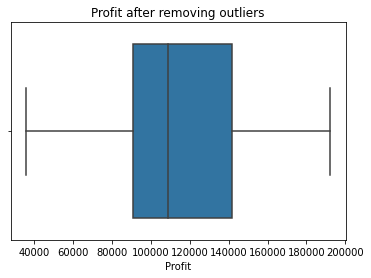

In [ ]:
sns.boxplot(df4.Profit)
plt.title('Profit after removing outliers')

In [ ]:
#compare outlier removed model with original model
model3 =smf.ols('Profit~RD+Administration+Marketing', data = df4).fit()
(model3.rsquared, model3.rsquared_adj)

(0.9613162435129848, 0.9587373264138505)

We can see here, the model has imporved slightly after removing the outlier. We will continue with this model.

In [ ]:
df4.State.value_counts()

New York      17
California    16
Florida       16
Name: State, dtype: int64

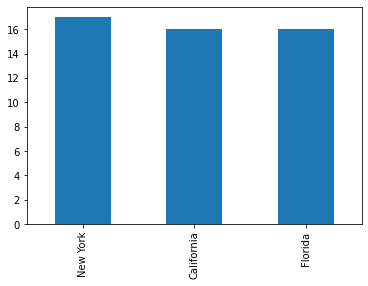

In [ ]:
df4.State.value_counts().plot(kind='bar')

The categorical object type column, is quite balanced and is not afftecing a lot to our dependent vairable  - Profit.

So we will drop this column for building our model.

In [ ]:
df_f = df4.drop('State', axis=1)

In [ ]:
df_f.head()

,RD,Administration,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [ ]:
 df_f.shape

(49, 4)

In [ ]:
#Correlation coef
df_f.corr()

,RD,Administration,Marketing,Profit
RD,1.000000,0.243438,0.711654,0.978437
Administration,0.243438,1.000000,-0.037280,0.205841
Marketing,0.711654,-0.037280,1.000000,0.739307
Profit,0.978437,0.205841,0.739307,1.000000


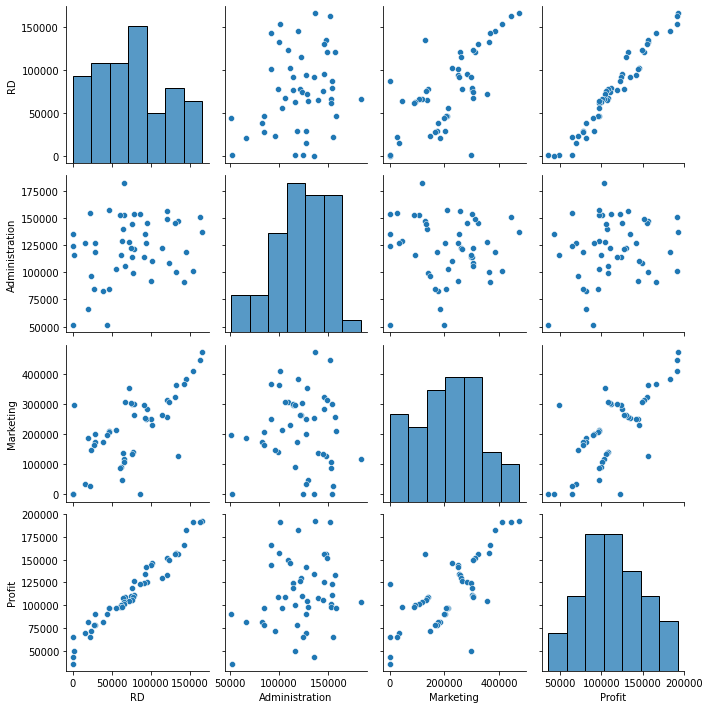

In [ ]:
sns.pairplot(df_f)

***Building the model***

In [ ]:
ml_f = smf.ols('Profit~RD+Administration+Marketing', data = df_f).fit()

In [ ]:
#Parameters
ml_f.params

Intercept         52382.439251
RD                    0.783002
Administration       -0.022201
Marketing             0.025234
dtype: float64

In [ ]:
#t-values & p-values
print(ml_f.tvalues, ' \n', ml_f.pvalues)

Intercept          9.450782
RD                20.469501
Administration    -0.517889
Marketing          1.825383
dtype: float64  
 Intercept         2.960000e-12
RD                1.971077e-24
Administration    6.070728e-01
Marketing         7.458443e-02
dtype: float64


As p values for Administration and Marketing are > 0.05. we will check for colinearity problem

We will perform simple linear regression on Administration then on Marketing. And then on both Administration and Marketing.

In [ ]:
ml_a = smf.ols('Profit~Administration', data=df_f).fit()

In [ ]:
print(ml_a.tvalues, '\n', ml_a.pvalues)

Intercept         3.346236
Administration    1.442053
dtype: float64 
 Intercept         0.001618
Administration    0.155918
dtype: float64


In [ ]:
(ml_a.rsquared, ml_a.rsquared_adj)

(0.04237035844418091, 0.02199525968767424)

In [ ]:
ml_m = smf.ols('Profit~Marketing', data=df_f).fit()

In [ ]:
print(ml_m.tvalues, '\n', ml_m.pvalues)

Intercept    8.427541
Marketing    7.526983
dtype: float64 
 Intercept    5.905020e-11
Marketing    1.304853e-09
dtype: float64


In [ ]:
(ml_m.rsquared, ml_m.rsquared_adj)

(0.5465748398585546, 0.536927496025758)

In [ ]:
ml_a_m = smf.ols('Profit~Administration+Marketing', data=df_f).fit()

In [ ]:
print(ml_a_m.tvalues, '\n', ml_a_m.pvalues)

Intercept         1.474103
Administration    2.508234
Marketing         8.027366
dtype: float64 
 Intercept         1.472650e-01
Administration    1.572324e-02
Marketing         2.695219e-10
dtype: float64


In [ ]:
(ml_a_m.rsquared, ml_a_m.rsquared_adj)

(0.6011271008483876, 0.583784800885274)

***Let us try with VIF.***

In [ ]:
#calculate VIF to detect colinearity
rsq_rd = smf.ols('RD~Administration+Marketing', data = df_f).fit().rsquared
vif_rd = 1/(1-rsq_rd)

rsq_admin = smf.ols('Administration~RD+Marketing', data = df_f).fit().rsquared
vif_admin = 1/(1-rsq_admin)

rsq_mark = smf.ols('Marketing~RD+Administration', data = df_f).fit().rsquared
vif_mark = 1/(1-rsq_mark)

#Storing vif values in dataframe
d1 = {'Variables':['RD', 'Administration', 'Marketing'], 'VIF':[vif_rd, vif_admin, vif_mark]}
vif_frame = pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,RD,2.377754
1,Administration,1.175172
2,Marketing,2.239957


No variable has VIF>20. So no colinearity.

***Residual Analysis***

Test for Normality of Residuals - QQ plots

In [ ]:
import statsmodels.api as sm

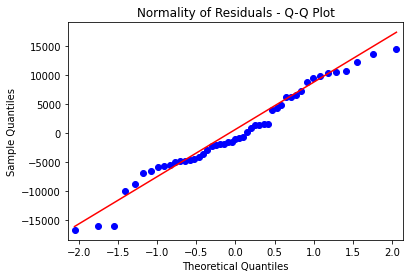

In [ ]:
#q line as the 45 degree line
qqplot = sm.qqplot(ml_f.resid, line = 'q')
plt.title('Normality of Residuals - Q-Q Plot')
plt.show()

We can conclude their no outliers.

Residual plot for Homoscedasticity

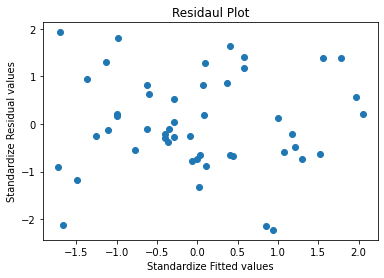

In [ ]:
#get standardized values
def get_standardized_values(vals):
  return (vals - vals.mean())/vals.std()

plt.scatter(get_standardized_values(ml_f.fittedvalues), get_standardized_values(ml_f.resid))
plt.ylabel('Standardize Residual values')
plt.xlabel('Standardize Fitted values')
plt.title('Residaul Plot')
plt.show()

Residual vs Regressors

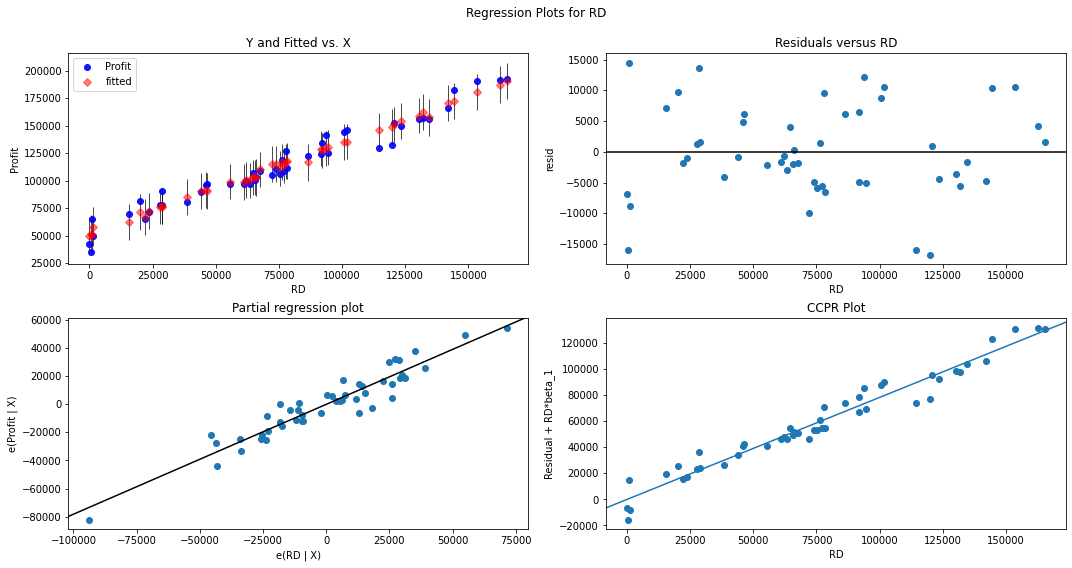

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(ml_f, 'RD', fig=fig)
plt.show()

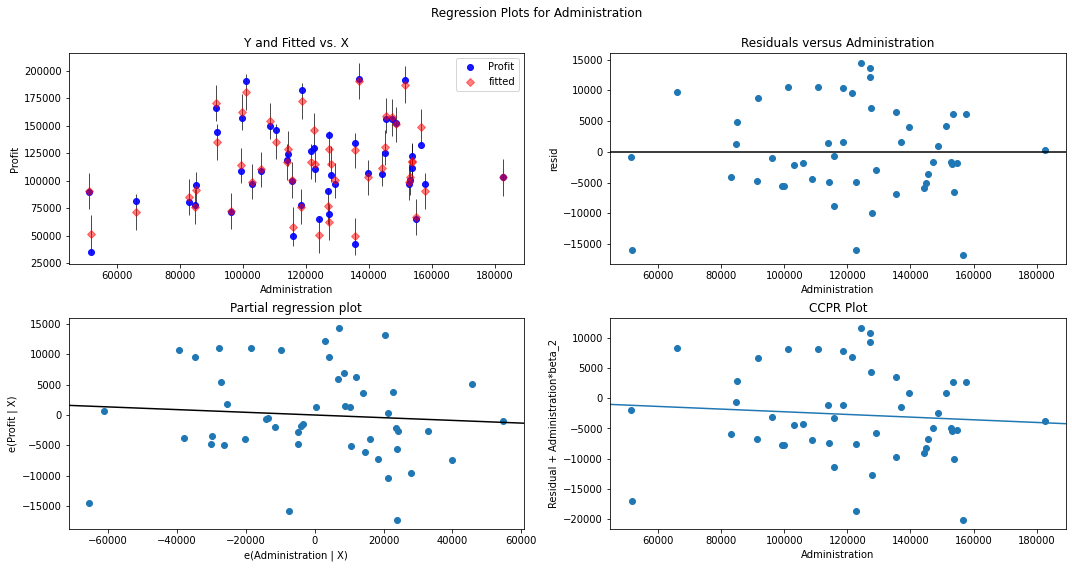

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(ml_f, 'Administration', fig=fig)
plt.show()

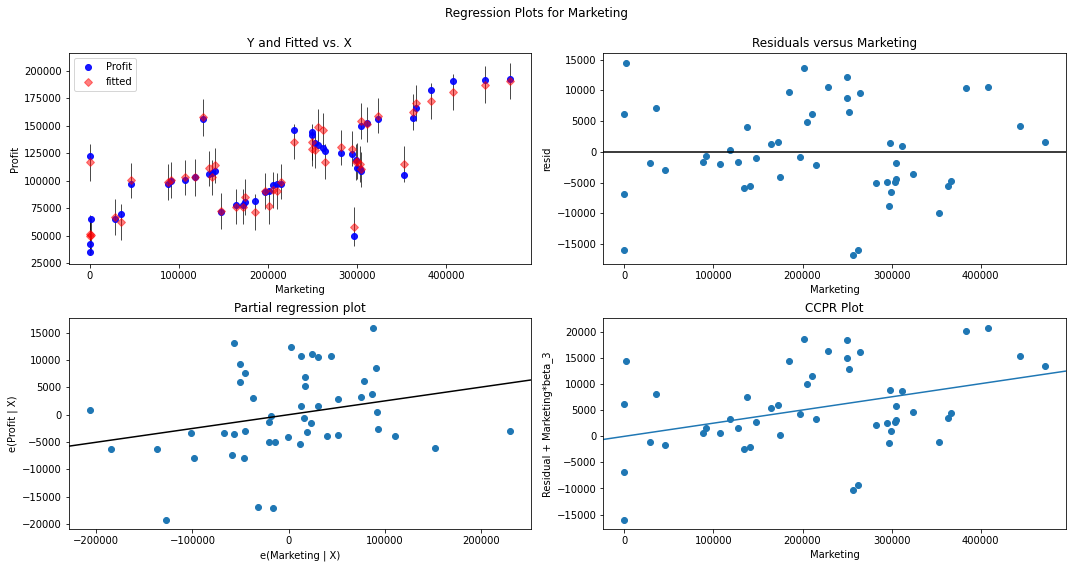

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(ml_f, 'Marketing', fig=fig)
plt.show()


***Model Deletion***

By using Cook's Distance and Leverage cut_off

In [ ]:
model_influence = ml_f.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


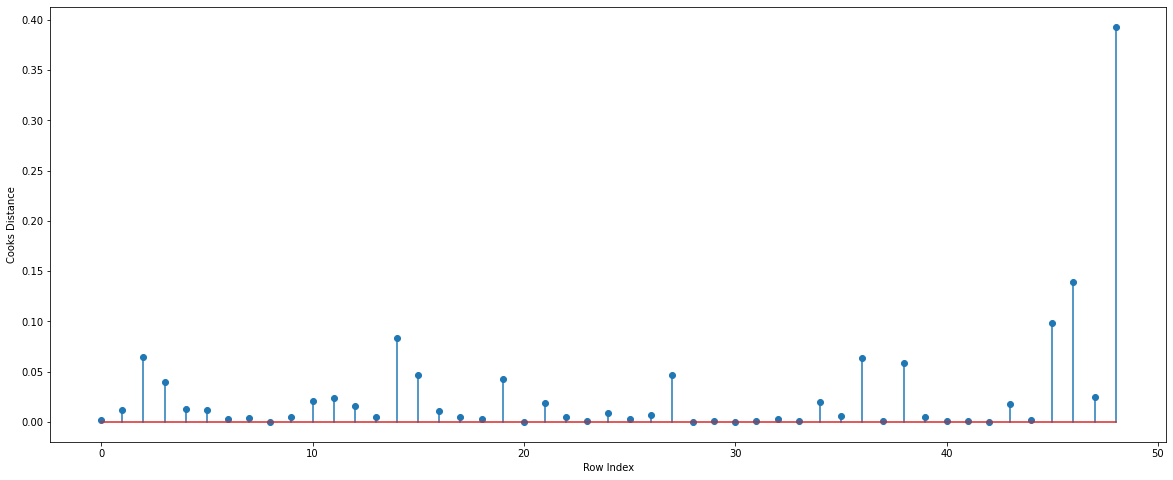

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(df_f)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index and values of influencers where c is more than .5
(np.argmax(c), np.max(c))

(48, 0.39274420556321504)

As the c is not more than 1. We can conclude there are no outliers or influencers.

High Influence Points

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot

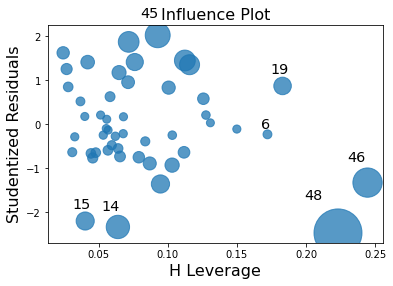

In [ ]:
influence_plot(ml_f)
plt.show()

In [ ]:
k = df_f.shape[1]
n = df_f.shape[0]
leverage_cutoff = 3*(k+1)/n

In [ ]:
leverage_cutoff

0.30612244897959184

As we can see in plot no points are above leverage cutoof value 0.306, we can conclude no influencers. 

So no deletion of datapoints required.

***Predict Model***

In [ ]:
#dataset3['research'].describe()
#dataset3['Admin'].describe()
#dataset3['Marketing'].describe()
df_f.describe()

,RD,Administration,Marketing,Profit
count,49.000000,49.000000,49.000000,49.000000
mean,75226.138367,121433.636327,214409.833265,113998.991020
std,45115.141560,28301.008988,121168.170072,38171.246893
min,0.000000,51283.140000,0.000000,35673.410000
25%,44069.950000,103057.490000,134050.070000,90708.190000
50%,73994.560000,122782.750000,214634.810000,108552.040000
75%,101913.080000,145077.580000,299737.290000,141585.520000
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
#New data for prediction
new_data=pd.DataFrame({'RD':4000,"Administration":70000,"Marketing":20000},index=[0])

In [ ]:
new_data

,RD,Administration,Marketing
0,4000,70000,20000


In [ ]:
ml_f.predict(new_data)

0    54465.02362
dtype: float64